**Assignment A - Week 1** **: Maximum Likelihood Estimator (MLE)**

This is** Assignment A** for Week 1. Below, you will find a simple exercise with 4 questions. Try to finish them, and commit your submission notebook !



## Exercise

The goal of this exercise is to use a Maximum Likelihood Estimator (MLE) to estimate a Poisson distribution from spike trains of spiking neurons.

**Note : ** Please plot the figures whenever it is asked.

1) Generate a function that, provided a firing rate, and a number of neurons **N** generates a collection of spike trains defined every ms (consisting of 1's and 0's depending on whether a spike was fired that millisecond or not) for each neuron. Here, we suppose that the neurons have the same firing rate.
The function should take three inputs: the number of neurons, the rate of the Poisson process and the length of the spike train to generate (duration in ms). The output will be a 2D np.array (N x duration) of spike-trains.

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import os

def generate_spikes(N,rate,duration):
 #probability of spike in ms
 spike=rate/1000
 #poisson process random spiking
 spikes=np.random.rand(N,duration)<spike
 return spikes.astype(int)

                  
2) Now, make a function that uses MLE to estimate the firing rate of the neurons from the spikes generated earlier. The function should take a 2D np.array (N x duration) of spikes trains as input and returns a scalar (rate) that is the firing rate of the neurons. Compute and print the estimated firing rate for the following situation:
- Number of neurons: N = 2
- rate = 50 Hz
- Duration = 0.5 seconds


In [78]:
def mle_fr(spikes):
  N,duration_ms=spikes.shape
  total_spikes=np.sum(spikes)
  total_time=(N*duration_ms)/1000
  rate=total_spikes/(total_time)
  return rate


In [79]:

# Generate the spikes using generate_spikes and the given parameters
# and run mle_fr here. Print the estimated firing rate.
N=2
rate=50
duration=int(0.5*1000)
spikes=generate_spikes(N,rate,duration)

estimated_rate=mle_fr(spikes)
print(f"Estimated firing rate: {estimated_rate:.2f} Hz")

Estimated firing rate: 46.00 Hz


3) Repeat the above process (spike generation and rate estimation with the same parameters N=2, rate = 50, duration = 0.5 s) 1000 times and plot the distribution of estimates you obtain. What is the mean of this distribution and the variance?

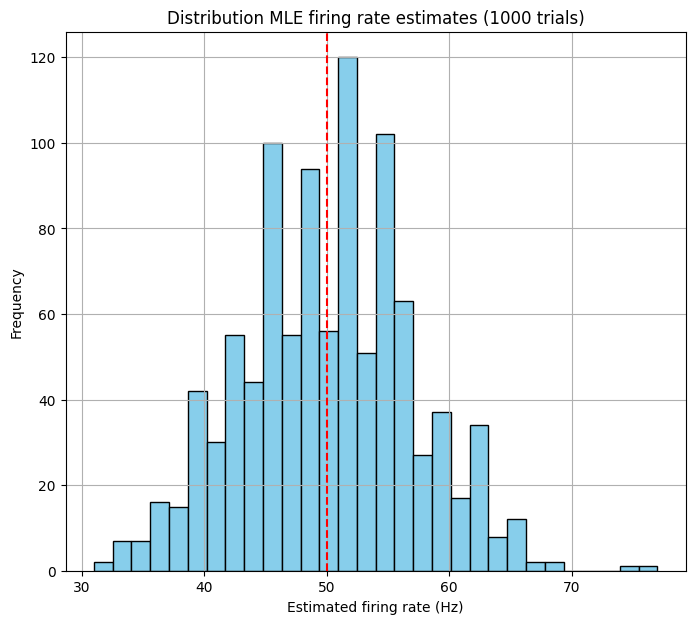

Mean estimated rate: 50.02 Hz
Vatiance estimate: 49.0388 (Hz^2)


In [80]:
from re import S
num_trials=1000
estimates=[]
for _ in range(num_trials):
  spikes=generate_spikes(N,rate,duration)
  rate_estimate=mle_fr(spikes)
  estimates.append(rate_estimate)

estimates=np.array(estimates)
mean_estimate=np.mean(estimates)
variance_estimate=np.var(estimates)

plt.figure(figsize=(8,7))
plt.hist(estimates,bins=30,color='skyblue',edgecolor='black')
plt.axvline(mean_estimate,color='red',linestyle='--',label=f"Mean = {mean_estimate:.2f} Hz")
plt.title("Distribution MLE firing rate estimates (1000 trials)")
plt.xlabel("Estimated firing rate (Hz)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


print(f"Mean estimated rate: {mean_estimate:.2f} Hz")
print(f"Vatiance estimate: {variance_estimate:.4f} (Hz^2)")

4) Now, we want to investigate how this variance depends on:

*   The number N of neurons
*   The duration of the spike-train

In order to perform this investigation, repeat the procedure in question 3) for the all the combinations of the following scenartios:

*   Nb_neurons   = (1, 2, 5, 10)
*   rates = (0.1 s, 0.5s, 1s, 2s)

Plot in a figure the table of the variances Nb_neurons x rates obtained by each combination of the two parameters

Variances (rows= Nb_neurons, coulumns=durations):
[[492.4831      97.4479      48.637959    24.126104  ]
 [253.1499      48.681276    23.520676    11.12485944]
 [ 94.557564    18.63777536   9.75091184   4.35464775]
 [ 50.550076     9.00114364   4.71619776   2.35515618]]


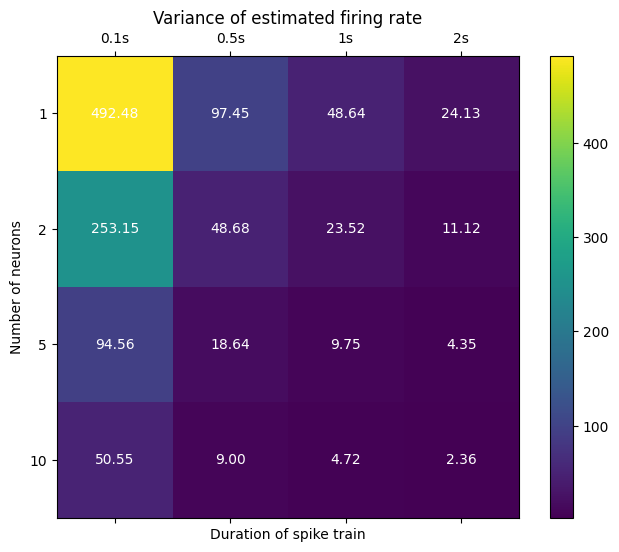

In [81]:
Nb_neurons = [1, 2, 5, 10]
durations_list_seconds = [0.1, 0.5, 1, 2]
variances=np.zeros((len(Nb_neurons),len(durations_list_seconds)))

for i,N in enumerate(Nb_neurons):
  for j, duration in enumerate(durations_list_seconds):
    estimates=[]
    duration_ms=int(duration*1000)
    for _ in range(num_trials):
      spikes=generate_spikes(N,rate,duration_ms)
      rate_estimate=mle_fr(spikes)
      estimates.append(rate_estimate)

    var_estimate=np.var(estimates)
    variances[i,j]=var_estimate

print("Variances (rows= Nb_neurons, coulumns=durations):")
print(variances)

fig,ax=plt.subplots(figsize=(8,6))
cax=ax.matshow(variances,cmap='viridis')
fig.colorbar(cax)

ax.set_xticks(range(len(durations_list_seconds)))
ax.set_yticks(range(len(Nb_neurons)))
ax.set_xticklabels([f"{d}s" for d in durations_list_seconds])
ax.set_yticklabels([str(n) for n in Nb_neurons])

ax.set_xlabel('Duration of spike train')
ax.set_ylabel('Number of neurons')
ax.set_title('Variance of estimated firing rate')

for(i,j), val in np.ndenumerate(variances):
  ax.text(j,i,f"{val:.2f}",ha='center',va='center',color='white')

plt.show()